In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/nikhildatta/Desktop/3033831.csv")

In [3]:
df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2000-01-01,0.0,"D,,S",11.1,"H,,S",19.5,",,S",5.6,",,S"
1,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2000-01-02,0.0,"D,,S",10.6,"H,,S",18.8,",,S",7.7,",,S"
2,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2000-01-03,0.0,"D,,S",9.4,"H,,S",19.2,",,S",6.6,",,S"
3,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2000-01-04,0.0,"D,,S",8.7,"H,,S",NaN,NaN,NaN,NaN
4,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2000-01-05,0.0,"D,,S",9.5,"H,,S",15.8,",,S",5.0,",,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2021-12-28,0.0,",,S",12.9,"H,,S",22.6,",,S",9.4,",,S"
8009,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2021-12-29,4.1,",,S",13.3,"H,,S",NaN,NaN,8.4,",,S"
8010,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2021-12-30,0.0,",,S",11.0,"H,,S",21.2,",,S",3.4,",,S"
8011,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2021-12-31,NaN,NaN,10.7,"H,,S",19.5,",,S",3.8,",,S"


In [4]:
df = df.drop(['STATION' ,'NAME' , 'PRCP_ATTRIBUTES' , 'TAVG_ATTRIBUTES' , 'TMAX_ATTRIBUTES' , 'TMIN_ATTRIBUTES' ], axis =1)

In [5]:
df.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
count,8.013000e+03,8.013000e+03,8013.0,2564.000000,8013.000000,6917.000000,6975.000000
mean,2.858300e+01,7.720000e+01,216.0,5.333463,25.145638,31.898251,18.805147
std,1.421174e-14,2.842348e-14,0.0,13.984311,7.337582,6.805178,7.757557
min,2.858300e+01,7.720000e+01,216.0,0.000000,6.600000,9.800000,0.200000
25%,2.858300e+01,7.720000e+01,216.0,0.000000,18.600000,26.900000,11.800000
50%,2.858300e+01,7.720000e+01,216.0,0.000000,27.200000,33.400000,19.900000
75%,2.858300e+01,7.720000e+01,216.0,3.000000,31.100000,36.700000,25.800000
max,2.858300e+01,7.720000e+01,216.0,166.900000,39.800000,46.000000,34.200000


In [6]:
df.shape

(8013, 8)

In [7]:
df.head()

,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,28.583,77.2,216.0,2000-01-01,0.0,11.1,19.5,5.6
1,28.583,77.2,216.0,2000-01-02,0.0,10.6,18.8,7.7
2,28.583,77.2,216.0,2000-01-03,0.0,9.4,19.2,6.6
3,28.583,77.2,216.0,2000-01-04,0.0,8.7,NaN,NaN
4,28.583,77.2,216.0,2000-01-05,0.0,9.5,15.8,5.0


In [8]:
df = df.drop(['LATITUDE' , 'LONGITUDE'], axis =1)

In [15]:
# Converting Date datatypes and spliting date into date, month and year.
df['DATE']=pd.to_datetime(df['DATE'])
df['Day']=df['DATE'].apply(lambda x:x.day)
df['Month']=df['DATE'].apply(lambda x:x.month)
df['Year']=df['DATE'].apply(lambda x:x.year)
df = df.drop(['DATE'] , axis =1)
df.head()


,ELEVATION,PRCP,TAVG,TMAX,TMIN,Day,Month,Year
0,216.0,0.0,11.1,19.5,5.6,1,1,2000
1,216.0,0.0,10.6,18.8,7.7,2,1,2000
2,216.0,0.0,9.4,19.2,6.6,3,1,2000
3,216.0,0.0,8.7,NaN,NaN,4,1,2000
4,216.0,0.0,9.5,15.8,5.0,5,1,2000


In [16]:
#can acccess specific sets of dates 
df.loc[df['Month'] == 1]

,ELEVATION,PRCP,TAVG,TMAX,TMIN,Day,Month,Year
0,216.0,0.0,11.1,19.5,5.6,1,1,2000
1,216.0,0.0,10.6,18.8,7.7,2,1,2000
2,216.0,0.0,9.4,19.2,6.6,3,1,2000
3,216.0,0.0,8.7,NaN,NaN,4,1,2000
4,216.0,0.0,9.5,15.8,5.0,5,1,2000
...,...,...,...,...,...,...,...,...
7677,216.0,NaN,11.4,21.5,3.8,28,1,2021
7678,216.0,NaN,11.7,NaN,4.0,29,1,2021
7679,216.0,NaN,13.3,NaN,5.4,30,1,2021
7680,216.0,NaN,12.3,NaN,3.1,31,1,2021


In [19]:
#removes need for isnull and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8013 entries, 0 to 8012
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ELEVATION  8013 non-null   float64
 1   PRCP       2564 non-null   float64
 2   TAVG       8013 non-null   float64
 3   TMAX       6917 non-null   float64
 4   TMIN       6975 non-null   float64
 5   Day        8013 non-null   int64  
 6   Month      8013 non-null   int64  
 7   Year       8013 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 500.9 KB


In [20]:
#can drop prcp due to high null value
df.apply(pd.isnull).sum()/df.shape[0]


ELEVATION    0.000000
PRCP         0.680020
TAVG         0.000000
TMAX         0.136778
TMIN         0.129539
Day          0.000000
Month        0.000000
Year         0.000000
dtype: float64

In [17]:
df.corr

<bound method DataFrame.corr of       ELEVATION  PRCP  TAVG  TMAX  TMIN  Day  Month  Year
0         216.0   0.0  11.1  19.5   5.6    1      1  2000
1         216.0   0.0  10.6  18.8   7.7    2      1  2000
2         216.0   0.0   9.4  19.2   6.6    3      1  2000
3         216.0   0.0   8.7   NaN   NaN    4      1  2000
4         216.0   0.0   9.5  15.8   5.0    5      1  2000
...         ...   ...   ...   ...   ...  ...    ...   ...
8008      216.0   0.0  12.9  22.6   9.4   28     12  2021
8009      216.0   4.1  13.3   NaN   8.4   29     12  2021
8010      216.0   0.0  11.0  21.2   3.4   30     12  2021
8011      216.0   NaN  10.7  19.5   3.8   31     12  2021
8012      216.0   NaN  11.4   NaN   4.2    1      1  2022

[8013 rows x 8 columns]>

In [21]:
df = df.drop(['PRCP'], axis =1)

In [23]:
#no dupe rows
df.duplicated().sum()

0

In [25]:
df.Day.value_counts() 


1     265
23    264
3     264
4     264
5     264
6     264
7     264
8     264
2     264
15    264
14    264
27    263
24    263
25    263
26    263
21    263
22    263
16    263
18    263
17    263
13    263
10    263
9     263
19    262
12    262
11    262
28    262
20    261
29    248
30    241
31    154
Name: Day, dtype: int64

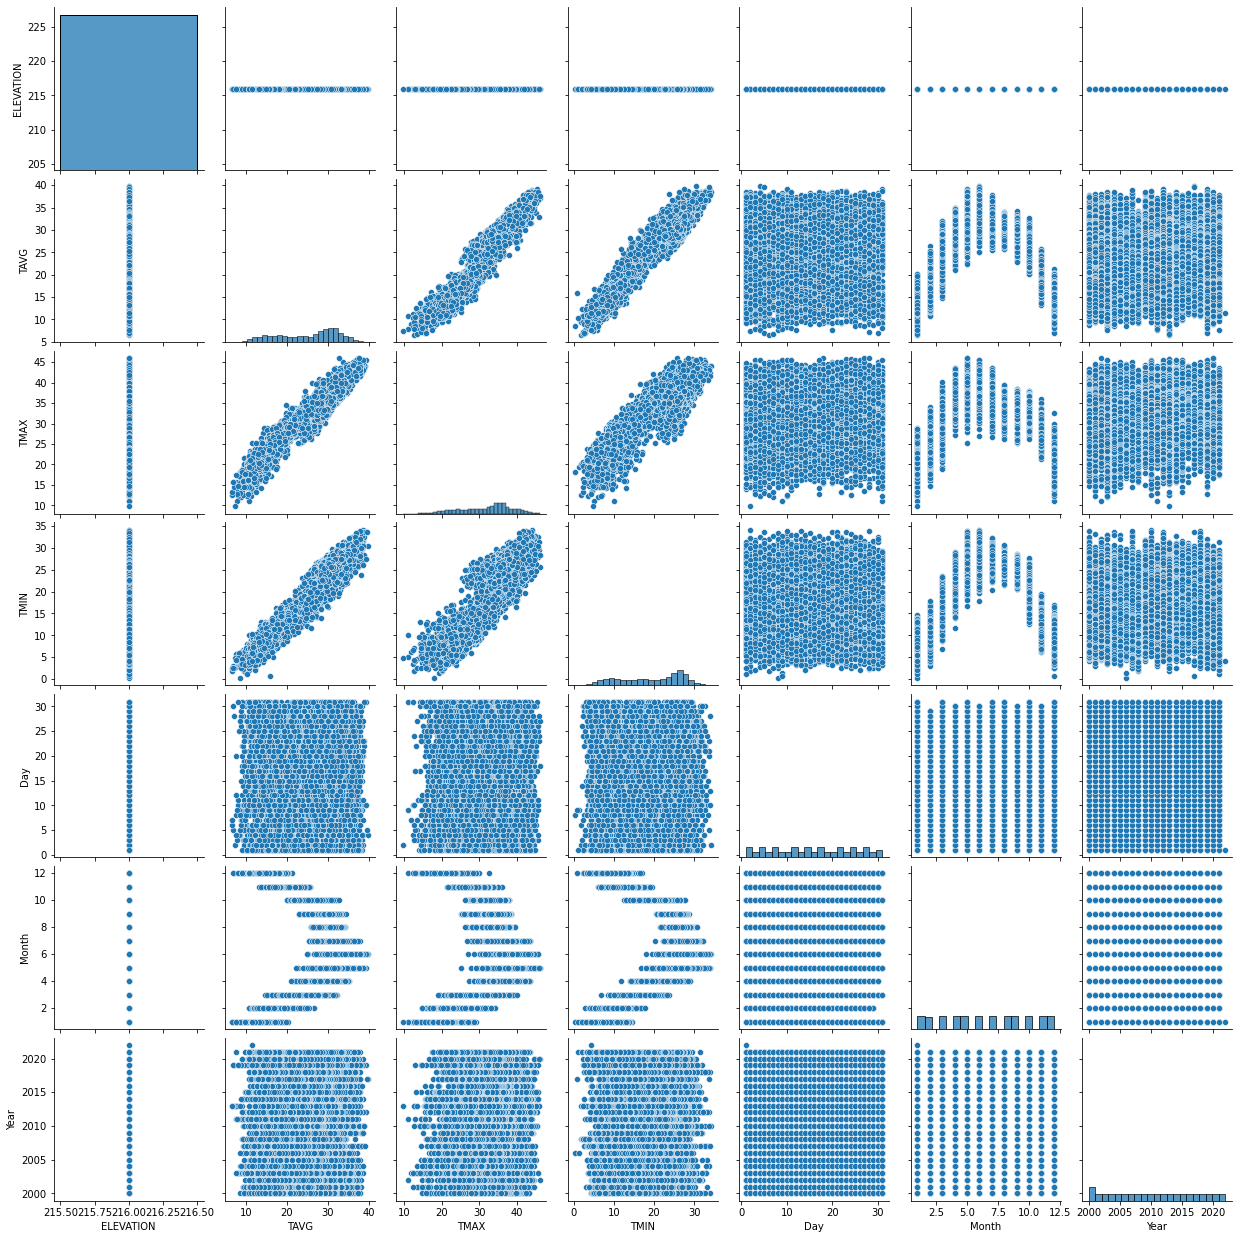

In [26]:
sns.pairplot(df)

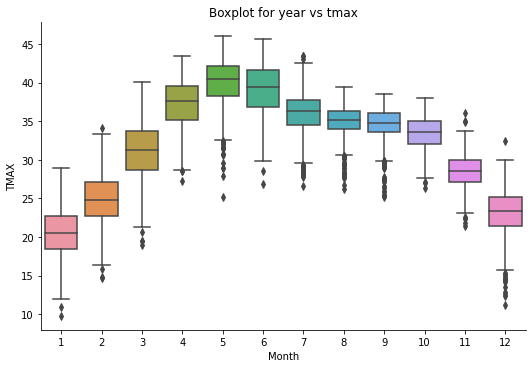

In [29]:
sns.catplot(x="Month", y="TMAX", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for year vs tmax")
plt.show()

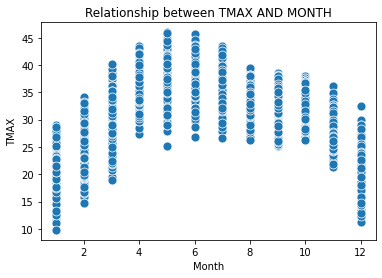

In [32]:
sns.scatterplot(x="Month", y="TMAX", data=df, palette="Dark2", s=80)
plt.title("Relationship between TMAX AND MONTH")
plt.show()

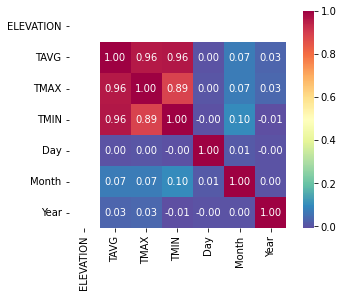

In [33]:

corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()